# Roteiro 2 - Medidas de tendência central/ Medidas de dispersão/ Medidas de associação




# Objetivo

Trabalhar com a base de dados "***IMDB data from 2006 to 2016***" com ajuda da ferramenta Google Colab e utilização da linguagem de programação Python, de maneira a fixar os Seguintes conteúdos: 

*   Medidas de tendência central
*   Medidas de dispersão
*   Medidas de associação

# 1 - Obtendo a base de dados

Assim como no roteiro da semana passada, nós iremos utilizar a plataforma Kaggle. Se você não sabe o que é o kaggle e nem pra que ele serve, dá uma olhada rapidinha no [roteiro Nº 1](https://colab.research.google.com/drive/1im4MlNdIdc9zRBy_wHiKmhPadmnTcBq-?usp=sharing#scrollTo=i1BBTqXC6zmX).

Para obter a base de dados do imbd vocês devem ir até o endereço https://www.kaggle.com , fazer login e procurar no menu *search* pelo termo: IMDB data from 2006 to 2016. Escolham o primeiro *dataset* by PrompCloud. Clique na opção "*download*", isso deverá baixar para o seu computador um arquivo chamado "datasets_1474_2639_IMDB-Movie-Data", por conveniência nós vamos renomear esse arquivo como "imdb.csv".

# 2- Importando bibliotecas iniciais e fazendo a leitura dos dados.

Agora que já temos o arquivo baixado e renomeado, vamos fazer o upload dele para o colab. Para fazer isto, clique no símbolo da pasta de arquivos no menu lateral esquerdo  e depois na opção "Fazer upload para armazenamento da sessão", por fim escolha seu arquivo.

Por enquanto vamos fazer o import apenas das bibliotecas que iremos usar inicialmente, são elas:

* **Pandas** - Para visualização e manipulação dos dados.
* **Numpy** - Para manipulação de dados em formatos de arrays e matrizes e realização de operações matemáticas.

* **Matplotlib**, **Seaborn** - Para criação de gráficos e visualizações.


Execute a célula abaixo para relizar a importação.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Execute a célula abaixo para realizar a leitura e armazenamento do dataset para a variável **imdb**.

In [2]:
imdb = pd.read_csv("imdb.csv", index_col=0)

Dê uma olhada no "cara" dos seus dados executando o comando: `seuDataset.head()`

In [3]:
#Exercício 1

imdb.head()

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,,,,,,,,,,,
1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


# 3 - Descrição do dataset

O *dataset* que vamos usar, nossa base dados, é composto por um conjunto de avaliações de filmes lançados entre os anos de 2006 e 2016. As avaliações foram realizadas por usuários reais do site IMDB. Além de contar com a nota de avaliação, variando de 0 a 10, o *dataset* possui um conjunto de colunas com caracterisicas do filme como: título, gênero, descrição, ano de lançamento, entre outras.

**Descrição das colunas:**

**Title** - Título do filme. <br>
**Genre** - Conjunto de gêneros atribuídos ao filme. <br>
**Description** - Sinopse da história.<br>
**Director** - Diretor do filme.<br>
**Actors** - Conjunto de atores que trabalharam no filme. <br>
**Year** - Ano de lançamento da obra.<br>
**Runtime(Minutes)** - Duração total do filme. <br>
**Rating** - Avalição dos usuários variando de 0 à 10. <br>
**Votes** - Total de votos recebidos no IMDB. <br>
**Revenue(Millions)** - Receita do filme. <br>
**Metascore** - Nota do site metacritic.com, fornecida por críticos de cinema. <br>

# 4 - Tratamento dos dados

Antes de começarmos a realizar o tratamento do dados, apenas por questões de praticidade na manipulação destes, iremos substitiur os caracteres de espaços inclusos nos nomes das colunas pelo caractere: _ (underscore)

Execute a célula abaixo para realizar essa mudança.

In [4]:
#Renomeando colunas - Substituição de espaços por símbolo underscore
imdb.rename(lambda column: column.replace(" ", "_"), axis=1, inplace=True)
imdb.head()

,Title,Genre,Description,Director,Actors,Year,Runtime_(Minutes),Rating,Votes,Revenue_(Millions),Metascore
Rank,,,,,,,,,,,
1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


Execute a celula abaixo e observe o resultado do método `.info()`.


In [28]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               1000 non-null   object 
 1   Genre               1000 non-null   object 
 2   Description         1000 non-null   object 
 3   Director            1000 non-null   object 
 4   Actors              1000 non-null   object 
 5   Year                1000 non-null   int64  
 6   Runtime_(Minutes)   1000 non-null   int64  
 7   Rating              1000 non-null   float64
 8   Votes               1000 non-null   int64  
 9   Revenue_(Millions)  1000 non-null   float64
 10  Metascore           1000 non-null   float64
dtypes: float64(3), int64(3), object(5)
memory usage: 133.8+ KB


Como você viu no resultado do método info(), as colunas Revenue_(Millions) e Metascore possuem respectivamente 128 e 64 linhas faltantes. Diferentemente do que fizemos no roteiro passado, desta vez não vamos descartar estas linhas, vamos optar por uma estratégia de imputação.

A estratégia que utilizaremos será subtitutição dos valores faltantes pela média dos valores totais. Execute a celula abaixo para realizar este passo.

In [5]:
imdb['Revenue_(Millions)'].fillna(imdb['Revenue_(Millions)'].mean(), inplace=True)
imdb['Metascore'].fillna(imdb['Revenue_(Millions)'].mean(), inplace= True)
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               1000 non-null   object 
 1   Genre               1000 non-null   object 
 2   Description         1000 non-null   object 
 3   Director            1000 non-null   object 
 4   Actors              1000 non-null   object 
 5   Year                1000 non-null   int64  
 6   Runtime_(Minutes)   1000 non-null   int64  
 7   Rating              1000 non-null   float64
 8   Votes               1000 non-null   int64  
 9   Revenue_(Millions)  1000 non-null   float64
 10  Metascore           1000 non-null   float64
dtypes: float64(3), int64(3), object(5)
memory usage: 93.8+ KB


Mesmo executando o méetodo `info()` às vezes alguns valores nulos passam despercebidos. Isso porque o valor no dataset pode estar preenchido por um dado do tipo NaN (not a number), que também não é um tipo válido para análises estatísticas.

Desse modo vamos calcular quantos valores do tipo NaN possuímos em cada coluna. Execute a célula abaixo para realizar essa operação.

In [6]:
imdb.isna().sum()

Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime_(Minutes)     0
Rating                0
Votes                 0
Revenue_(Millions)    0
Metascore             0
dtype: int64

A composição de métodos isna().sum() nos mostrou que a coluna Genre possui 1 valor nulo. Isso é bem razoável e pouco preocupante. Como temos apenas 1 linha comprometida, temos 3 opções de correção:

* 1 - Realizar uma imputação (substiução do dado) com base nos demais filmes
* 2 - Verificar o nome do filme e substituir pelo gênero deste.
* 3 - Excluir a linha

Usualmente quando temos um dataset de tamanho razoável e temos apenas uma linha com dados faltantes, nós excluímos a linha. Isso porque ela representa muito pouco comparado ao tamanho do dataset. No nosso caso, ela representa 0.1% do total.

Mesmo assim, não é o que faremos neste roteiro. **:O** 

Nós vamos optar pela segunda opção. Execute a célula abaixo para obter o nome do filme com gênero faltante.

In [7]:
imdb['Title'][imdb['Genre'].isna()]

Series([], Name: Title, dtype: object)

Fazendo uma rápida pesquisa no site do IMDB, verificamos que o gênero do filme Nine Lives é  Comedy, Drama, Family, Fantasy. Seguindo o padrão do dataset vamos adicionar os 3 primeiros gêneros organizados alfabeticamente crescente. 

Execute a célula abaixo para realizar essa modificação.

In [8]:
filter = imdb['Title'] == 'Nine Lives'
imdb.loc[filter, 'Genre'] = "Comedy,Drama,Family"

Pronto, agora não temos valores nulos e poderemos fazer nossas análises com essas colunas, sem problemas. 

Mas antes disso, dê mais uma olhada no *dataset*. Perceba que a coluna Genre é composta por mútilplos gêneros em cada linha. Essas mútilplas classificações podem se tornar problemáticas para nossas futuras análises, isso porque pode acontecer de cada filme estar classificado em "gêneros" especificos e distintos.  

O que isso quer dizer na prática é que talvez não possamos agrupar os filmes por gênero, o que na vida real é algo natural quando falamos de filmes, não é mesmo?

Mas será que isso de fato acontecendo no nosso *dataset* ? Para verificar essa hipotese, vamos utilizar o método `value_counts()` da biblioteca pandas. Esse método faz a contagem de linhas repetidas na mesma coluna, no nosso caso ele vai servir para vermos quantos filmes são classficados no mesmo gênero.

Execute a célula abaixo para ver o que o `value_counts()` nos tráz.

In [9]:
imdb['Genre'].value_counts()

Action,Adventure,Sci-Fi    50
Drama                      48
Comedy,Drama,Romance       35
Comedy                     32
Drama,Romance              31
                           ..
Comedy,Romance,Western      1
Action,Horror,Mystery       1
Adventure,Drama,Horror      1
Drama,Fantasy,Mystery       1
Thriller,War                1
Name: Genre, Length: 206, dtype: int64

Bom, deu para perceber que foi possível agrupar os filmes em categorias, visto que o número de linhas foi reduzido de 1000 para 207, isso é bom. Contudo alguns gêneros contabilizaram apenas 1 filme. Vamos ver quantos foram estes gêneros, executando a célula abaixo.


In [10]:
imdb['Genre'].value_counts()[imdb['Genre'].value_counts() == 1]

Action,Fantasy,War        1
Sci-Fi,Thriller           1
Action,Comedy,Sport       1
Comedy,Mystery            1
Adventure,Biography       1
                         ..
Comedy,Romance,Western    1
Action,Horror,Mystery     1
Adventure,Drama,Horror    1
Drama,Fantasy,Mystery     1
Thriller,War              1
Name: Genre, Length: 84, dtype: int64

Dos 207 agrupamentos, 84 possuiam apenas um filme. Podemos melhorar isso. Vamos utilzar apenas as primeiras dois gêneros e ver se isso nos ajuda. 

Apenas para melhorar a manipulação da coluna Genre vamos juntar os dois primeiros gênero de cada filme seguindo padrão: ***Genero1_Genero2***

Execute as células abaixo para modificar o *dataset* e verificar se a nossa ideia ajudou a reduzir o número de categorias.


In [11]:
#Alteração no padrão dos gêneros
genres_joined = [("_").join(genres) for genres in (imdb['Genre'].apply(lambda x: x.split(",")[0:2]))]

In [12]:
#Substituição ds gêneros pelo novo padrão
genres_joined_series = pd.Series(genres_joined, index = imdb.index)
imdb.loc[:,'Genre'] = genres_joined_series

In [13]:
#Contagen de gênero que possuem apenas 1 filme
filter_genres = imdb['Genre'].value_counts() == 1
print(imdb['Genre'].value_counts()[filter_genres])
print('Length: ' , len(imdb['Genre'].value_counts()[filter_genres]))

Animation_Family     1
Adventure            1
Drama_Western        1
Fantasy_Mystery      1
Sci-Fi_Thriller      1
Comedy_Western       1
Crime_Thriller       1
Comedy_Mystery       1
Thriller_War         1
Animation_Fantasy    1
Biography_History    1
Drama_Musical        1
Adventure_Crime      1
Comedy_Sci-Fi        1
Name: Genre, dtype: int64
Length:  14


Conseguimos reduzir de 84 para 14 o conjunto de gêneros que agrupam somente 1 filme, isso é razoável. Agora (enfim)vamos partir paras as análises.

#5 - Medidas descritivas

Agora que você já obteve seu conjunto de dados, realizou a etapa de tratamentos e identificou os tipo dos dados de cada variável, vamos explorá-los um pouco e iniciarmos nossa análise descritiva. 

De acordo com Reis, E.A., Reis I.A. (2002) a análise descritiva é utilizada para "organizar, resumir e descrever os aspectos importantes de um conjunto de características observadas ou comparar tais características entre dois ou mais conjuntos". Dessa forma nas próximas atividades você vai aprender maneiras de utilizar ferramentas descritivas, dentro da linguagem python, que serão úteis para realizar sua análise.

Nesse roteiro iremos aprender a calcular as seguintes medidas descritivas:


*   Medidas de tenedência central
    *   Média
    *   Mediana
    *   Moda
*   Medidas de variabilidade ou dispersão
    *   Desvio padrão
    *   Variância


## 5.1 Medidas de tendência central

### 5.1.1 Média (amostral)


A média de uma variável,  ***x***,  consiste na soma de todos os seus valores dividida pelo número de amostras, ***N***, da variável:  

#<center>$\frac{{\sum_{i=1}^{N} x_i}}{N}$</center>

Para calcular a média de uma váriavel, vamos utilizar o método **`.sum()`**  e a função **`len()`** na variável que desejamos calcular a média.

O método `**sum()**` irá somar todos os valores apresentados na váriavel, equanto a função **`len()`** nos retornará o  número de linhas da amostra, isto é, seu tamanho.

No exercicío 2, complete o código para calcular o valor da média para as variáveis Rating e Metascore armazene em duas variáveis chamadas rating_media e metascore_media. 

Em seguida utilize a função print() passando como argumento a variavel com a média armazenada. (Por exemplo `print(minhaVariavel)`)


In [14]:
#Exercício 2

rating_media = imdb['Rating'].sum()/len(imdb['Rating'])
print("Média da váriavel Rating", rating_media)

metascore_media = imdb['Metascore'].sum()/len(imdb['Metascore'])
print("Média da váriavel Metascore", metascore_media)

Média da váriavel Rating 6.723199999999999
Média da váriavel Metascore 60.51920807339448


Agora que você aprendeu a calcular a média, utilize o método .mean() nas váriaveis Rating e Metascore e compare o resultado com o obtido no exercicio anterior.

In [15]:
#Exercício 3
imdb['Rating'].mean()
imdb['Metascore'].mean()

60.519208073394395

### 5.1.2 Mediana


A mediana é o valor que separa a metade maior da metade menor da nossa variável, ou seja é o valor do meio. 

Quando temos um número de amostras ímpar a mediana é simplesmente o valor central do conjunto. Por exemplo, no conjunto {0,1,2,3,4} a mediana é 2, pois este número separa o conjunto nas metades menor e maior.

Contudo quando o número de amostras é par, não existe uma maneira direta de indicar apenas um elemento para representar o meio do conjunto. Nesse caso nós fazemos a média dos dois elementos do meio. Por exemplo no conjunto {0,1,2,3,4,5} os elementos 2 e 3 estão no meio do conjunto e a medidana se dá através da cálculo: 

#<center> $ \frac{2 + 3}{2} = 2.5 $ </center>

É importante observar que para calcular a mediana a nossa variável **precisa** estar ordenada de maneira ascendente. No exercício #4, vamos calcular a mediana da variável **Rating** manualmente e comparar o resultado com a implementação do python utilizando a função `median()` da biblioteca numpy.


Complete a célula do exércicio 4.

Dicas: As funções `ceil()` e `floor()` são reponsáveis por nos retornar o teto e piso de um número real. Por exemplo o teto de 3.5 é 4, já o piso de 3.5 é 3. Ou seja o teto é o primeiro inteiro maior que o número decimal analisado, e o piso é primeiro menor número inteiro.



In [16]:
#Exercício 4
rating_ordenada = imdb['Rating'].sort_values(ascending=True).copy().values

#Cálculo das posições do meio
indice_posicao_meio_1 = int(np.floor((len(rating_ordenada) - 1)/2))
indice_posicao_meio_2 = int(np.ceil((len(rating_ordenada) -1)/2))

print("Índice do primeiro número do meio: ", indice_posicao_meio_1, "Índice do segundo número do meio: ", indice_posicao_meio_2)

print("Mediana", (rating_ordenada[indice_posicao_meio_1] + rating_ordenada[indice_posicao_meio_2])/2)
print("Mediana", np.median(rating_ordenada))

Índice do primeiro número do meio:  499 Índice do segundo número do meio:  500
Mediana 6.8
Mediana 6.8


### 5.1.3 - Moda

A moda de uma variável amostral é o valor que aparece mais vezes no conjunto de dados. Por exemplo, na sequencia [0,1,2,3,1,4,5,5,6,1,7] a moda é o valor 1, pois ele aparece 3 vezes.

Na célula do exercício #5 complete o código para encontrar a moda da variável ***Year*** manualmente e depois compare utilizando o método `value_counts()` da biblioteca ***pandas*** e selecionando o elemento com maior frequência;


In [17]:
#Exercício 5

year = imdb['Year'].copy()

#Código para calcular a moda 'manualmente'

year_ordenado = year.sort_values(ascending = True)
lista_frequencias = []
contador_frequencia = 1
ano_atual = year.iloc[0]

for ano in year_ordenado:
    if ano == ano_atual:
        contador_frequencia += 1
    else:
        lista_frequencias.append([ano_atual, contador_frequencia])
        ano_atual = ano
        contador_frequencia = 1
lista_frequencias.append([ano_atual, contador_frequencia])
idx = np.argmax([l[1] for l in lista_frequencias])
moda_manual = lista_frequencias[idx][0]




#Moda utilizando o value_counts()
moda = year.value_counts().index[0]
print("Lista da frequencia de cada ano calculada manualmente\n", lista_frequencias)

print("\nModa calculada manualmente", moda_manual )
print("Moda", moda )

Lista da frequencia de cada ano calculada manualmete
 [[2014, 1], [2006, 44], [2007, 53], [2008, 52], [2009, 51], [2010, 60], [2011, 63], [2012, 64], [2013, 91], [2014, 98], [2015, 127], [2016, 297]]

Moda calculada manualmete 2016
Moda 2016


## 5.2 - Medidas de dispersão

### 5.2.1 - Variância (amostral)

A variância é definida pela soma do quadrado dos desvios das amostras em relação à média da amostra, divido pelo total de valores na amostra menos 1. 

# <center> $s^2 =\sum_{i=1}^{n}\frac{(x - \bar{x})^2}{n - 1 }$ 

Onde $\bar{x}$ é a média da amostra e $n$ o tamanho da amostra.


Complete o código do exercício #6 para calcular a variância da variável ***Rating*** e depois utilize a função `var()` da biblioteca *numpy*, utilizando o comando `np.var(minhaVariavel)`.

In [18]:
#Exercício 6

#Complete o código para calcular variância manualmente

rating = imdb.Rating.copy()
media_rating = rating.mean()
sum_var = 0

for rate in rating:
    sum_var += (rate - media_rating)**2

var = sum_var/len(rating)

var_numpy = np.var(rating)

print("Variância da variável Rating calculada manualmente: ", var)
print("Variancia da variável Rating com numpy: ", var_numpy)


Variância da variável Rating calculada manualmente:  0.8929417600000007
Variancia da variável Rating com numpy:  0.8929417600000007


### 5.2.2 - Desvio Padrão (amostral)

O desvio padrão é definido como a raíz quadrada da variância, portanto:


# <center> $ s = \sqrt{ \sum_{i=1}^{n}\frac{(x - \bar{x})^2}{n - 1 }}$ 

Complete o código do exercício #7 para calcular o desvio padrão da variável *Rating*.  


In [19]:
#Exercício 7
desvio = np.sqrt(var_numpy)
print("Desvio padrão: ", desvio)

Desvio padrão:  0.9449559566455998



### 5.2.3 Detecção de outliers utilizando medidas de dispersão

Um outlier é um valor que distoa dos demais, uma valor extremo. Por exemplo na sequencia [0,2,1,1,100] o valor 100 pode ser considerado um outlier, pois distoa dos demais por ser muito mais alto que todos os outros. 

Quando estamos analisando dados, outliers podem nos trazer uma falsa percepção do que os dados realmente querem nos dizer. Como nesta sequência, em que a média dos valores é 20.8, este valor claramente não representa o nosso conjunto de dados.

#### 5.2.3.1 - Detecção de outliers utilizando *score* Z

O *score* Z é uma medida que nos diz o quão afastado um valor, pertencente a uma variável, está da média. Precisamente,  ele nos diz a quantas unidades de desvio padrão o valor está afastado da média. 

O calculo deste score é feito de acordo com a equação abaixo:

# <center> $  z = \frac{x - \bar{x}}{s}$

Onde $\bar{x}$ é a média da amostra e $s$ o seu desvio padrão.

Quando os nossos dados seguem uma distribuíção normal, nós podemos utilizar este valor como uma métrica, de maneira que essa quantidade nos diz se um dado é ou não um outlier.

Para isso a estatística utiliza a seguinte regra:

### <center> Se |z| > 3, então o valor é um *outlier*.

Uma maneira intuitiva de verificar se a sua variável têm uma distribuição aproximada da normal, é fazendo um histograma. Na celula abaixo apresentamos o histograma da variável ***Rating***. Execute o código para visualizar. 






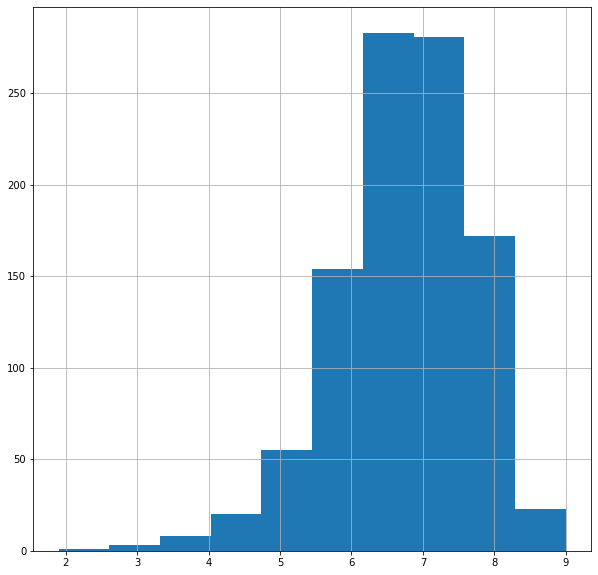

In [20]:
figure = plt.figure(figsize=(10,10))

axis  = figure.gca()
hist = imdb['Rating'].hist(ax= axis)

Perceba que a partir do histograma, podemos suspeitar que a distribuição é normal. No exercício #8, complete o código e utilize a regra do *score* Z para identificar os outliers de ***Rating***



In [21]:
#Exercício 8

rating = imdb['Rating'].copy()

media_rating = rating.mean()
desvio_rating = rating.std()

scores_z = []
for rate in rating:
    scores_z.append((rate - media_rating )/desvio_rating)

print("Socres Z for Rating:\n", scores_z)

outliers = rating[np.absolute(scores_z) > 3]
print("Outliers: ", outliers)

Socres Z for Rating:
 [1.456270441110088, 0.2927772066380513, 0.6100935433122431, 0.5043214310875128, -0.5533996911597937, -0.6591718033845249, 1.6678146655595505, -0.3418554667103322, 0.3985493188627816, 0.2927772066380513, 0.8216377677617046, 1.1389541044358964, 1.2447262166606274, 1.033181992211166, -0.3418554667103322, -0.13031124226087165, 1.5620425533348183, -0.024539130036140444, 1.456270441110088, 1.3504983288853578, -0.024539130036140444, 1.2447262166606274, -0.024539130036140444, -0.23608335448560192, -1.5053487011823699, 0.08123298218858983, 1.6678146655595505, -2.139981374530753, -0.5533996911597937, -0.8707160278339855, -0.4476275789350634, 0.8216377677617046, 0.3985493188627816, 1.3504983288853578, -1.188032364508178, 1.2447262166606274, 1.9851310022337414, 0.9274098799864349, 0.18700509441332103, 0.3985493188627816, -0.4476275789350634, 0.8216377677617046, -4.2554236190253665, 0.5043214310875128, -0.4476275789350634, -0.024539130036140444, 0.6100935433122431, -1.18803236

#### 5.2.3.2 Detecção de ouliers com boxplot e  distância inter-quartil.


Quando os seus dados não seguem uma distribuição normal, você pode detectar os *outliers* utilizando um boxplot. A detecção é feita através do cálculo da distância dos quartís. 

A regra nos diz que se um valor é menor que Q1 - 1.5xIQR ou maior que Q3 + 1.5xIQR, onde Q1 e Q3 são respectivamente o primeiro e terceiro quartís e IQR é a distância inter-quartil (Q3 - Q1), então esse valor é um *outlier*.

Complete o código do exercicío #9 para calcular os quartis e indentificar os outliers da variável ***Rating***.

In [22]:
#Exercício 9
rating = imdb['Rating'].copy()

Q1 = np.percentile(rating,25)
Q3 = np.percentile(rating, 75)

IQR = Q3 - Q1

outliers_baixos = rating[(rating < Q1 - 1.5*IQR)]
outliers_altos = rating[(rating > Q3 + 1.5*IQR)]

print("Outliers baixos:\n ", outliers_baixos)
print("Outliers altos:\n ", outliers_altos)

Outliers baixos:
  Rank
43     2.7
50     3.7
64     4.1
238    3.9
270    3.7
402    3.9
509    4.3
526    3.9
553    4.3
582    4.2
617    4.0
648    3.2
801    4.3
830    1.9
839    4.2
872    2.7
891    3.5
953    4.3
969    3.5
Name: Rating, dtype: float64
Outliers altos:
  Series([], Name: Rating, dtype: float64)


Uma visualização dos outliers pode ser feita utilizando o gráfico boxplot. No exercício 10, u
tilize o comando **`sns.boxplot(minhaVariavel)`** para obter o gráfico da variável ***Rating***

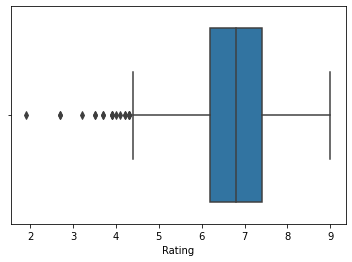

In [23]:
#Exercícío 10
box = sns.boxplot(imdb['Rating'])

No gráfico boxplot podemos ver que valores abaixo de 4.5 já são considerados *outliers*. Confirmando os resultados do exercício anterior.

# 6 - Medidas de associação

As medidas de asssociação visam compreender o grau de relacionamento entre as variáveis. Entender se o crescimento de uma variável está relacionado ao de outra, pode ser uma informação muito útil quando precisamos analisar um conjunto de dados. 

Isso porque as análises buscam entender o comportamento dos dados e extrair o máximo de informação possível que nos ajude a interpretá-los com coerência.

Nos próximos tópicos iremos abordar duas maneiras de explorar a associação entre duas variáveis: os gráficos de dispersão e a análise de correlação.





Que tal verificar se a receita do filme se relaciona de alguma maneira com sua avaliação? 

Para analisar essa hipotese vamos criar um gráfico de dispersão. No exercício abaixo utilize o método `scatter` no dataframe do imbd. Complete o código escolhendo as colunas ***Revenue_(Millions)*** e *Rating* para os parâmetros x e y respectivamente.

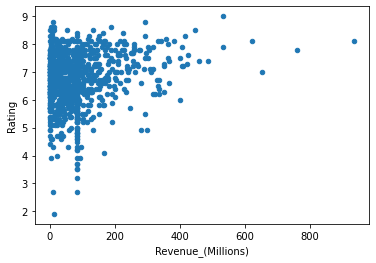

In [24]:
#Exercício 11

#Remoção dos outliers das avaliações
imdb_cp = imdb.drop(outliers_baixos.index, axis=0)

#Remoção dos outlierrs da receita
revenue = imdb['Revenue_(Millions)'].copy()

Q1_re = np.percentile(revenue,25)
Q3_re = np.percentile(revenue, 75)

IQR_re = Q3_re - Q1_re

outliers_baixos_re = revenue[(revenue < Q1_re - 1.5*IQR_re)]
outliers_altos_re = revenue[(revenue > Q3_re + 1.5*IQR_re)]


imdb_cp = imdb_cp.drop(outliers_altos_re.index, axis=0)
imdb_cp = imdb_cp.drop(outliers_baixos_re.index, axis=0)


#plot de dispersão
imdb.plot.scatter(x = "Revenue_(Millions)", y = "Rating" )

Pelo gráfico obtido, parece que a receita pouco tem a ver com a avaliação, não é mesmo? Você já tinha ideia disso?

Perceba que o crescimento da receita não mostra um aumento ou descremeto da notas, o mesmo acontece para o decrescimento da receita.

Repita o exercicio, mas agora utilize a coluna de duração: ***Runtime_(Minutes)*** no lugar da coluna referente a receita. 

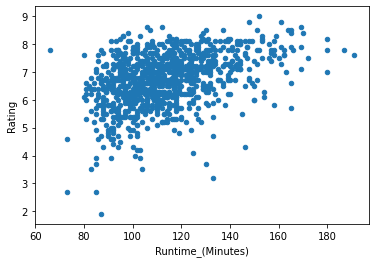

In [25]:
#Exercicio 12
imdb.plot.scatter(x = "Runtime_(Minutes)", y = "Rating")

Perceba que dessa vez conseguimos identificar algum grau de associação entre as variáveis. Ao que parece, à medida que a duração do filme aumenta, as notas de avaliação dos usuários também tendem a aumentar, indicando uma correlação positiva. 


Contudo, os dados não parecem seguir muito a risca a reta positiva, o que indica que essa correlação é fraca.

## 6.2 Análise de correlação

O gráfico de dispersão nos dá uma boa ideia da associação entre as variáveis. Mas e se pudessemos quantificar essa associação ? 

É isso que a análise de correlação faz, ela quantifica o grau de correlação, r, entre duas variáveis.

A análise do valor r, se dá da seguinte maneira:

* r > 0 - correlação positiva (as variaveis  tendem a crescer ou decrescer juntas)
* r < 0 - correlação negativa (quando uma variável cresce a outra tende decrescer e vice-versa)
* r = 1 ou muito próximo de 1 - correlação positiva forte 
* r = -1 ou muito próximo de -1  - correlação negativa forte


Vamos refazer os exercícios anteriores, mas agora calculando o coefienciente de correlação.
Nos exercícios #12 e #13, complete o código utilizando novamente os pares de variáveis: (Revenue_(Millions), Rating), e (*Runtime_(Minutes)*, *Rating*)

In [26]:
#Exercício 12

#Remoção dos outliers das colunas de receita e avaliação
imdb_cp = imdb.drop(outliers_altos_re.index, axis=0)
imdb_cp = imdb_cp.drop(outliers_baixos.index, axis=0)

r1 = np.corrcoef(imdb_cp['Revenue_(Millions)'], imdb_cp['Rating'])

print("O coeficiente de correlação entre receita do filme e avaliação é: ", r1[0][1])




O coeficiente de correlação entre receita do filme e avaliação é:  0.06230379810673178


In [27]:
#Exercício 13

#Remoção dos outliers de e avaliação
imdb_cp = imdb.drop(outliers_baixos.index, axis=0)

#Calculo do coeficiente de relçao entre ass colunas de duração do filme e avaliação
r2 = np.corrcoef(imdb_cp['Runtime_(Minutes)'], imdb_cp['Rating'])

print("O coeficiente de correlação entre duração do filme e avaliação é: ", r2[0][1])

O coeficiente de correlação entre duração do filme e avaliação é:  0.3958617467292908


Perceba que os coeficientes de correlação confirmaram nossas suspeitas feitas a partir da análise dos gráficos de dispersão.